# Задание 4. Работа с CSV

[1] "Date"   "Gold"   "Dollar"

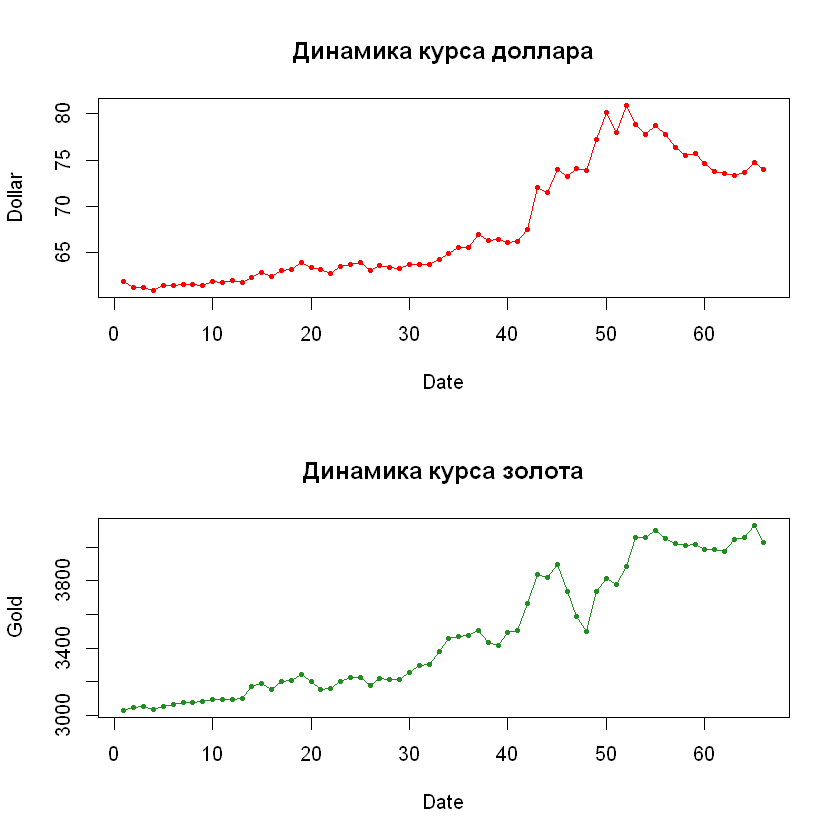

In [14]:
#2. 
dynamics = read.csv(file = 'data/dynamics.csv', sep = ';') 

names(dynamics)
attach(dynamics)#напрямую обращаться к переменным таблицы

data = dynamics$Date

par(mfrow=c(2,1))

plot(Dollar, col="red", pch = 16 ,cex = 0.5, main = "Динамика курса доллара", xlab="Date", ylab="Dollar", type = "o")

plot(Gold, col= "forestgreen" , pch = 16 ,cex = 0.5, main = "Динамика курса золота", xlab="Date", ylab="Gold", type = "o")

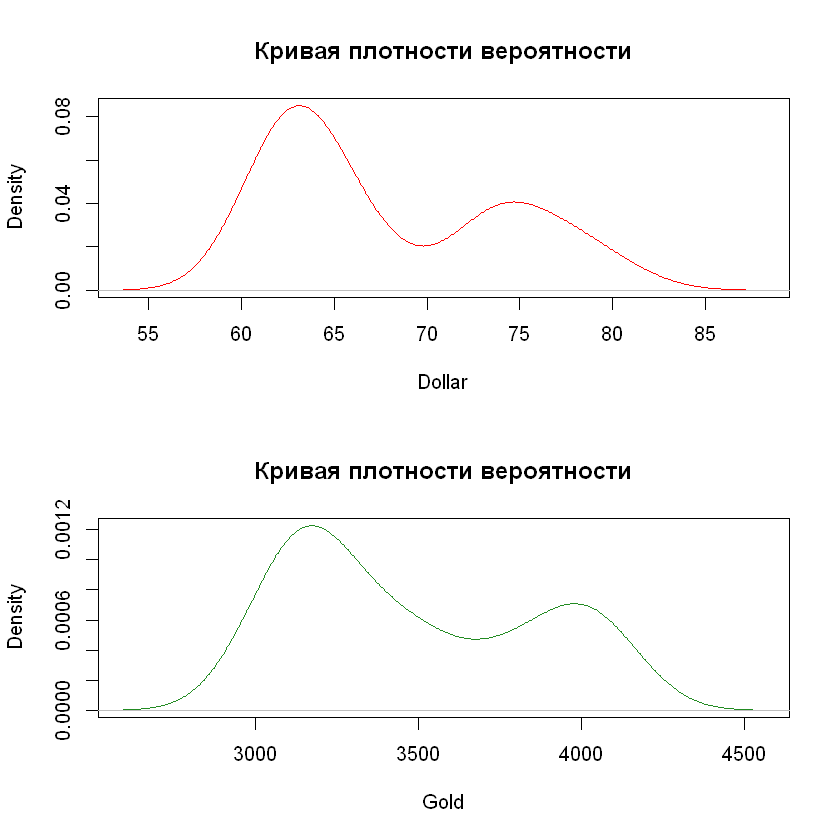

In [15]:
#3. 

par(mfrow=c(2,1))
plot(density(Dollar),col="red", pch = 16 ,cex = 0.5, main = "Кривая плотности вероятности", xlab="Dollar", ylab="Density")
plot(density(Gold),col="forestgreen", pch = 16 ,cex = 0.5, main = "Кривая плотности вероятности", xlab="Gold", ylab="Density")

In [17]:
#4.
# тест Шапиро-Уилка проверка на нармольность 
shapiro.test(Dollar)
shapiro.test(Gold)

#data:  Dollar
#W = 0.84686, p-value = 9.726e-07 => гипотеза отвергается т.к <0,05

#data:  Gold
#W = 0.87194, p-value = 6.17e-06 => гипотеза отвергается т.к <0,05


	Shapiro-Wilk normality test

data:  Dollar
W = 0.84686, p-value = 9.726e-07



	Shapiro-Wilk normality test

data:  Gold
W = 0.87194, p-value = 6.17e-06


In [19]:
#Тогда 
chisq.test(Dollar, Gold)

cor(Dollar, Gold, method = c('pearson'))
cor(Dollar, Gold, method = c('kendall'))
cor(Dollar, Gold, method = c('spearman'))
# знак положительный значит прямая зависимость, близкое значение к 1 означает о сильной связи между переменными

Warning message in chisq.test(Dollar, Gold):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  Dollar and Gold
X-squared = 4290, df = 4225, p-value = 0.2386


[1] 0.9352426

[1] 0.8340326

[1] 0.9518213

In [20]:
t.test(Dollar, Gold)
#data:  Dollar and Gold
#t = -74.86, df = 65.037, p-value < 2.2e-16 => т.к <0,05 то гипотезу о равенстве средних отвергается


	Welch Two Sample t-test

data:  Dollar and Gold
t = -74.86, df = 65.037, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3505.384 -3323.210
sample estimates:
 mean of x  mean of y 
  67.82197 3482.11924 


In [25]:
#5.
#trees
attach(trees)#напрямую обращаться к переменным таблицы
cor(trees, method = c('pearson'))

#        Girth    Height    Volume
#Girth  1.0000000 0.5192801 0.9671194
#Height 0.5192801 1.0000000 0.5982497
#Volume 0.9671194 0.5982497 1.0000000

# по таблице корреляции Пирсона можно увидеть что между Volume и Girth 
#существует сильная положительная кореляция, а между Height и Volume умеренная + корреляция и тд

The following objects are masked from trees (pos = 3):

    Girth, Height, Volume

The following objects are masked from trees (pos = 4):

    Girth, Height, Volume

The following objects are masked from trees (pos = 5):

    Girth, Height, Volume



,Girth,Height,Volume
Girth,1.0000000,0.5192801,0.9671194
Height,0.5192801,1.0000000,0.5982497
Volume,0.9671194,0.5982497,1.0000000


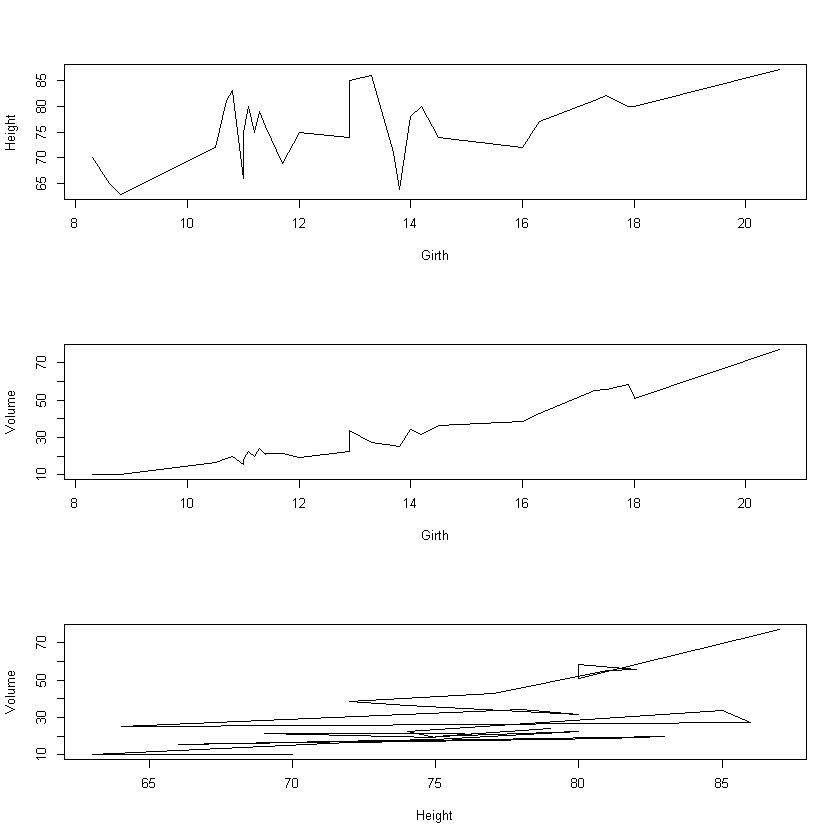

In [26]:
#6.
#Линейные графики отражают связь между зависимой и независимой переменной. 

par(mfrow=c(3,1))
plot(Girth, Height, type="l")
plot(Girth, Volume, type="l")
plot(Height, Volume, type="l")

In [27]:
#7.
cov(trees)
#таблица ковариации

#        Girth   Height    Volume
#Girth   9.847914 10.38333  49.88812
#Height 10.383333 40.60000  62.66000
#Volume 49.888118 62.66000 270.20280

# из полученных результатов можно сделать ввывод что что все величины зависимы.

,Girth,Height,Volume
Girth,9.847914,10.38333,49.88812
Height,10.383333,40.60000,62.66000
Volume,49.888118,62.66000,270.20280


Warning message:
"package 'gclus' was built under R version 4.3.0"Loading required package: cluster


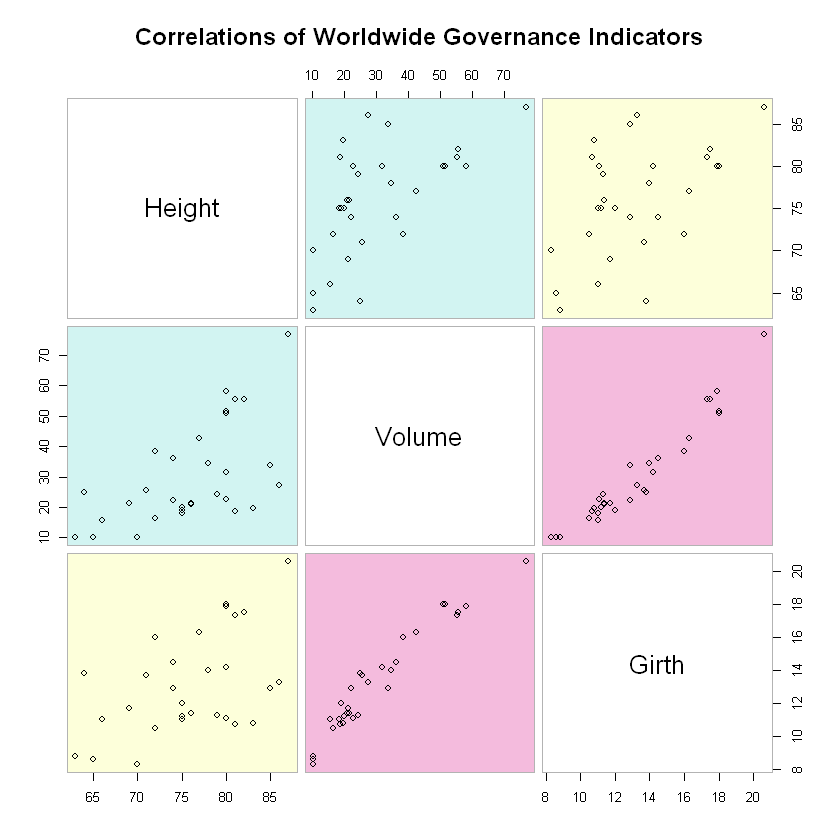

In [1]:
#8.

library(gclus)

coeffs = abs(cor(trees))

colors = dmat.color(coeffs)

order = order.single(coeffs)

cpairs(trees, order, panel.colors = colors, gap = .5,
       main = "Correlations of Worldwide Governance Indicators" )